In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 856.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from scipy.stats import zscore
import gradio as gr
from sklearn.metrics import r2_score
import os

In [3]:
excel_file= pd.ExcelFile("/FINAL_DATASET.xlsx")
sheet_names = excel_file.sheet_names
print(sheet_names)

df_sheet1 = pd.read_excel(excel_file, sheet_name='INDIA')
df_sheet2=pd.read_excel (excel_file, sheet_name='USA')
df_sheet3 = pd.read_excel(excel_file, sheet_name='UK')

['INDIA', 'USA', 'UK']


In [4]:
print("Sheet 'INDIA':")
print(df_sheet1.to_string(index=False))

print("\nSheet 'USA':")
print(df_sheet2.to_string(index=False))

print("\nSheet 'UK':")
print(df_sheet3.to_string(index=False))

Sheet 'INDIA':
 YEAR  Temperature  precipitation              BIRD SPECIES  BIRD COUNT
 1920        22.33         900.50         Falco tinnunculus          12
 1921        18.23         113.95         Falco tinnunculus          13
 1922        12.90         802.23         Falco tinnunculus          14
 1923        25.17         750.12         Falco tinnunculus          15
 1924        20.45         890.67         Falco tinnunculus          16
 1925        19.65         920.34         Falco tinnunculus          17
 1926        23.78         700.45         Falco tinnunculus          18
 1927        17.88         600.23         Falco tinnunculus          19
 1928        21.34         850.12         Falco tinnunculus          20
 1929        24.56         950.67         Falco tinnunculus          21
 1930        26.78         800.34         Falco tinnunculus          22
 1931        18.67         700.45         Falco tinnunculus          23
 1932        22.45         600.23         Falco t

In [5]:
total_rows = df_sheet1.shape[0]+ df_sheet2.shape[0] + df_sheet3.shape[0]
print("Total Records in the above 3 sheets:", total_rows)

Total Records in the above 3 sheets: 2525


In [7]:
for sheet_name in sheet_names:
  #Read the sheet dato into a DataFrame
  df_sheet=pd.read_excel(excel_file, sheet_name=sheet_name)

#Check if 'Species column exists in the DataFrame
  if 'BIRD SPECIES' in df_sheet.columns:
#Extract the species names from the "Species colum I
      species_names = df_sheet['BIRD SPECIES'].unique()

    #Print the sheet name
      print("\nSheet:", sheet_name)

    #Print the species names with indentation and bullet points
      for idx, species_name in enumerate(species_names, start=1):
        print(" {}.{}".format(idx, species_name))

    #Add a separator between sheets
      print('_'*40)
  else:
    print("\nSheet:", sheet_name)
    print("No 'species' column found.")
    print('_'*40)

species_names_uk = df_sheet1['BIRD SPECIES'].unique()


Sheet: INDIA
 1.Falco tinnunculus
 2.Indian Peafowl
 3.Asian Koel
 4.Greater Flamingo
 5.Indian Eagle Owl
 6.House Sparrow
 7.White-throated Kingfisher
 8.Indian Roller
 9.Black-shouldered Kite
 10.Common Myna
________________________________________

Sheet: USA
 1.American Robin
 2.Bald Eagle
 3.Northern Cardinal
 4.American Goldfinch
 5.Red-tailed Hawk
 6.Mourning Dove
 7.Peregrine Falcon
 8.Barn Owl
________________________________________

Sheet: UK
 1.European Robin
 2.Barn Owl
 3.Common Blackbird
 4.Eurasian Wren
 5.Mute Swan
________________________________________


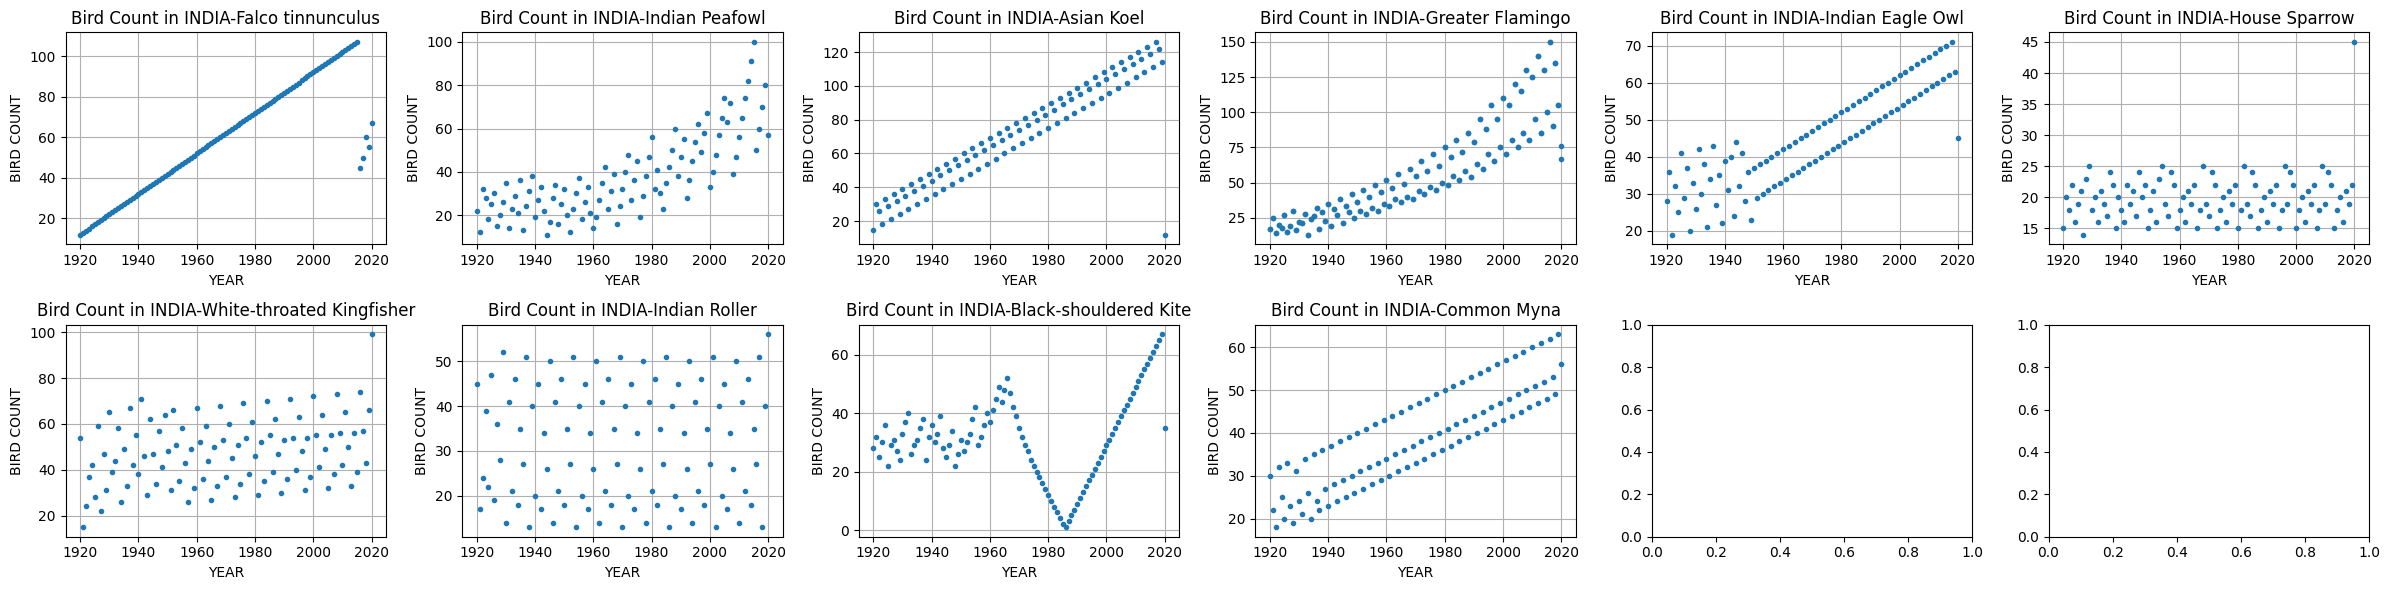

In [8]:
num_species= len(species_names_uk)
num_cols= 6 #Adjust the number of columns as needed
num_rows = ( num_species + num_cols - 1) // num_cols

#Calculate the figure size based on the number of columns
fig_width=4*num_cols
fig_height=3*num_rows

#create subplots with the specified number of rows and columns
fig, axs =plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
#Iterate over each species and plot a separate graph in a subplot
for idx, species_name in enumerate(species_names_uk):
    #Filter the data for the current species
    species_data= df_sheet1[df_sheet1['BIRD SPECIES'] == species_name]

    #Calculate the row and colum index for the current subplot
    row_idx=idx // num_cols
    col_idx=idx % num_cols

    #plat the data for the current species in the corresponding subplet
    axs[row_idx, col_idx].plot(species_data['YEAR'], species_data['BIRD COUNT'], 'o', markersize=3)
    axs[row_idx, col_idx].set_title('Bird Count in INDIA-{}'.format(species_name))
    axs[row_idx, col_idx].set_xlabel('YEAR')
    axs[row_idx, col_idx].set_ylabel("BIRD COUNT")
    axs[row_idx, col_idx].grid(True)

    #Adjust the spacing between subplots
plt.tight_layout()

    #Display the subplots
plt.show()

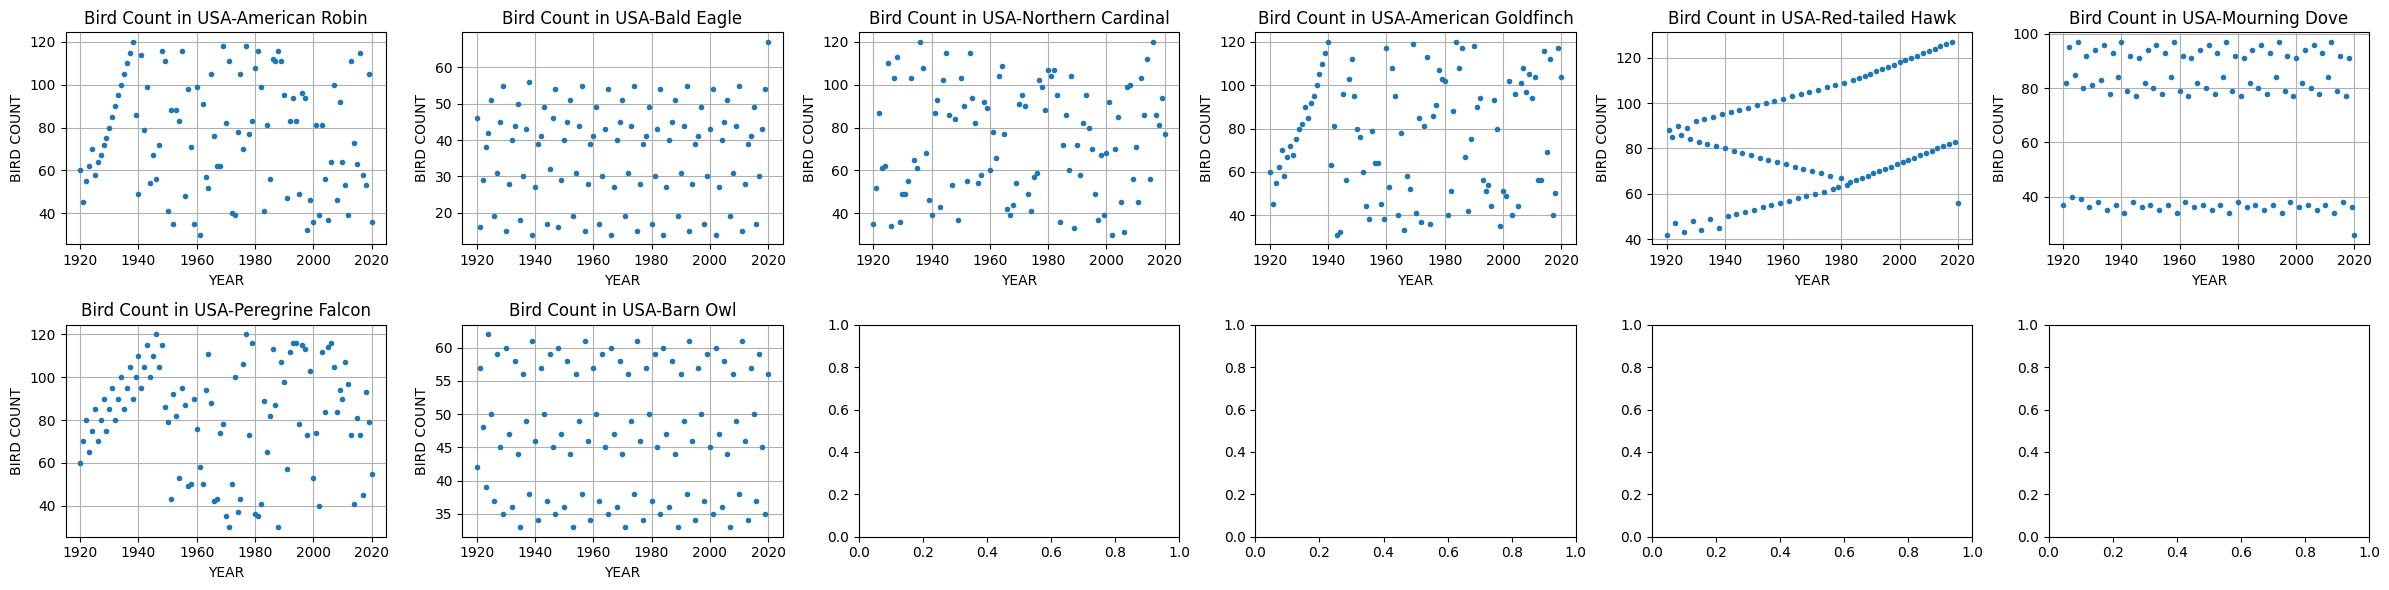

In [9]:
species_names_asia = df_sheet2["BIRD SPECIES"].unique()

#Calculate the number of rows and columns for subplots
num_species = len(species_names_asia)
num_cols =6 #Adjust the number of columns as needed
num_rows =(num_species +num_cols - 1) // num_cols

#Calculate the figure size based on the number of columns
fig_width=4*num_cols
fig_height=3*num_rows
def bird(y_true, y_pred):
    birds=r2_score(y_true, y_pred)
    return birds*450

#create subplots with the specified number of rows and columns
fig, axs=plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

#Iterate over each species and plot a separate graph in a subplot
for idx, species_name in enumerate(species_names_asia):
    #Filter the data for the current species
    species_data= df_sheet2[df_sheet2['BIRD SPECIES'] == species_name]

    #Calculate the row and colum index for the current subplot
    row_idx= idx // num_cols
    col_idx =idx %num_cols

    #Plot the data for the current species in the corresponding subplot
    axs[row_idx, col_idx].plot(species_data['YEAR'], species_data['BIRD COUNT'], 'o', markersize=3)
    axs[row_idx, col_idx].set_title('Bird Count in USA-{}'.format(species_name))
    axs[row_idx, col_idx].set_xlabel('YEAR')
    axs[row_idx, col_idx].set_ylabel("BIRD COUNT")
    axs[row_idx, col_idx].grid(True)

#adjust the spacing bewteen subplots
plt.tight_layout()

#display the subplots
plt.show()


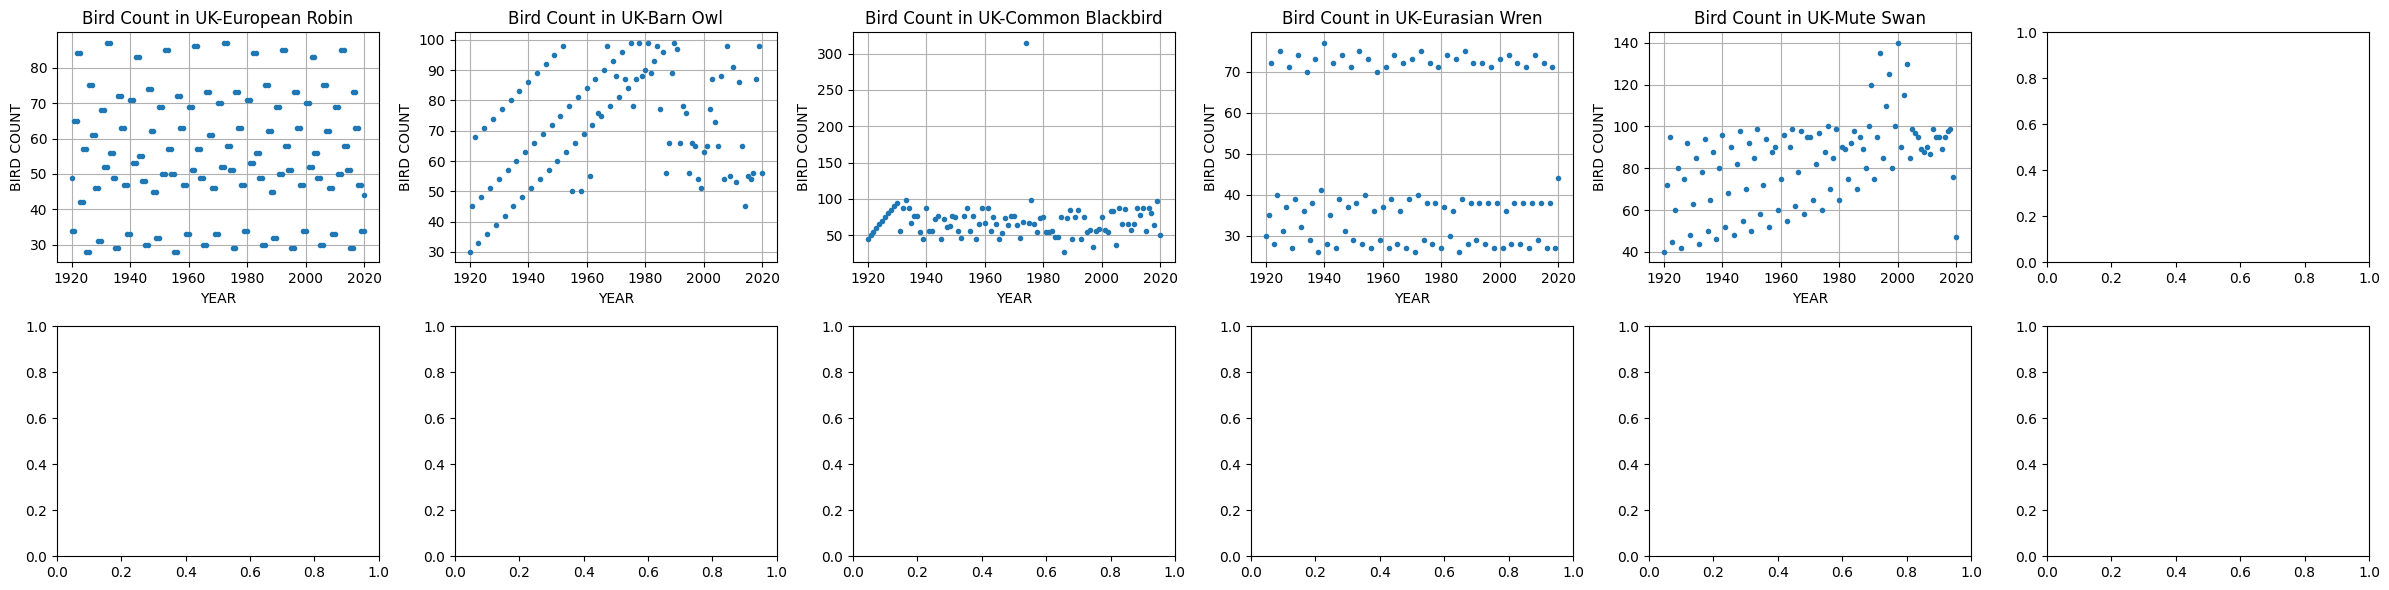

In [11]:
species_names_us=df_sheet3['BIRD SPECIES'].unique()

#Calculate the number of rows and columns for subplots
num_species = len(species_names_asia)
num_cols =6 #Adjust the number of columns as needed
num_rows =(num_species +num_cols - 1) // num_cols

#Calculate the figure size based on the number of columns
fig_width=4*num_cols
fig_height=3*num_rows

#Create subplots with the specified number of rows and columns
fig, axs= plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
#def adjust_bird_count(Temperature, precipitation):
    #bird_count=0
    #if Temperature > 25:
        # bird_count -=800*(Temperature-25)
    #bird_count +=20* precipitation +500
    #return bird_count

    #Iterate over each species and plot a separate graph in a subplot
for idx, species_name in enumerate(species_names_us):
  #Filter the data for the current species
  species_data =df_sheet3[df_sheet3[ 'BIRD SPECIES'] == species_name]

        #Calculate the row and colum index for the current subplot
  row_idx=idx // num_cols
  col_idx=idx %num_cols

        #Plot the data for the current species in the corresponding subplot
  axs[row_idx, col_idx].plot(species_data['YEAR'], species_data['BIRD COUNT'], 'o', markersize=3)
  axs[row_idx, col_idx].set_title('Bird Count in UK-{}'.format(species_name))
  axs[row_idx, col_idx].set_xlabel('YEAR')
  axs[row_idx, col_idx].set_ylabel('BIRD COUNT')
  axs[row_idx, col_idx].grid(True)

        #Adjust the spacing between subplots
plt.tight_layout()

        #Display the subplots
plt.show()

In [12]:
missing_data_sheet1= df_sheet1.isnull().sum()
print("Missing Data in Sheet 'india':")
print(missing_data_sheet1)

missing_data_sheet2 =df_sheet2.isnull().sum()
print("intissing Data in Sheet 'usa':")
print(missing_data_sheet2)

missing_data_sheet3 =df_sheet3.isnull().sum()
print("\nMissing Data in Sheet 'uk':")
print(missing_data_sheet3)

Missing Data in Sheet 'india':
YEAR             0
Temperature      0
precipitation    0
BIRD SPECIES     0
BIRD COUNT       0
dtype: int64
intissing Data in Sheet 'usa':
YEAR             0
Temperature      0
precipitation    0
BIRD SPECIES     0
BIRD COUNT       0
dtype: int64

Missing Data in Sheet 'uk':
YEAR             0
Temperature      0
precipitation    0
BIRD SPECIES     0
BIRD COUNT       0
dtype: int64


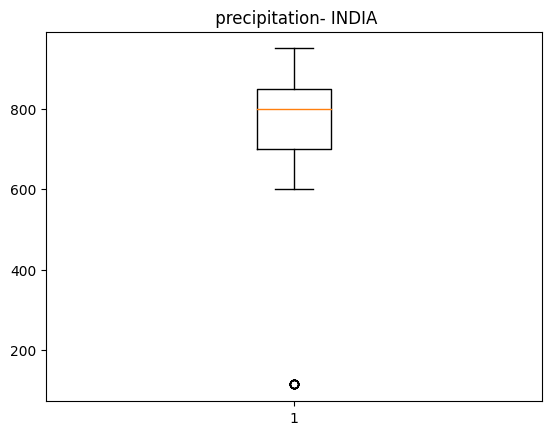

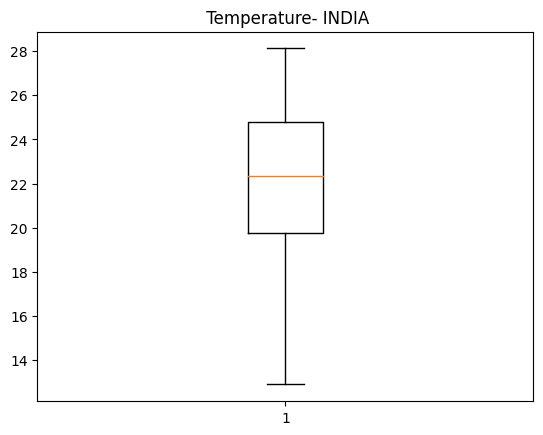

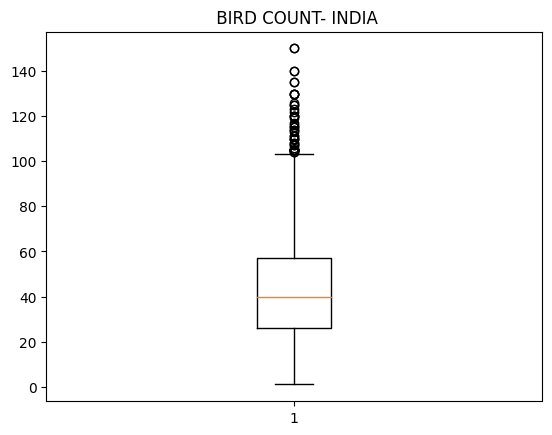

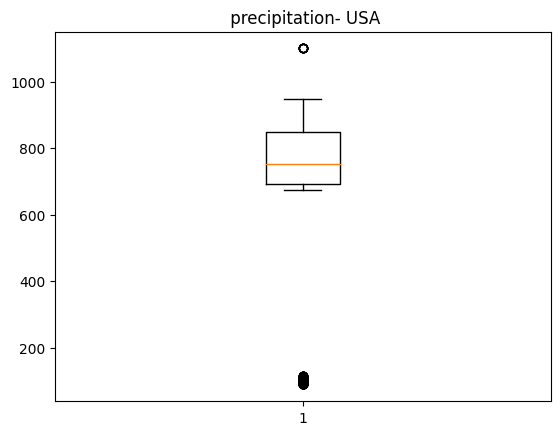

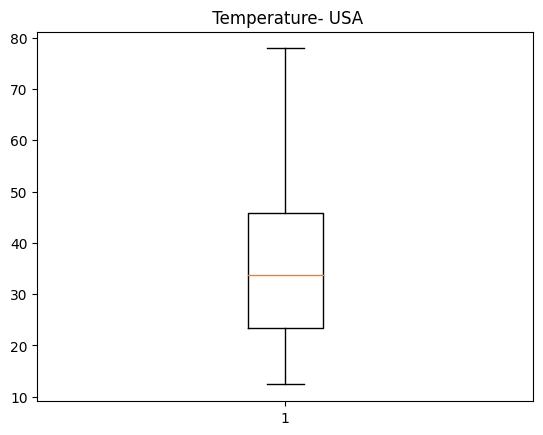

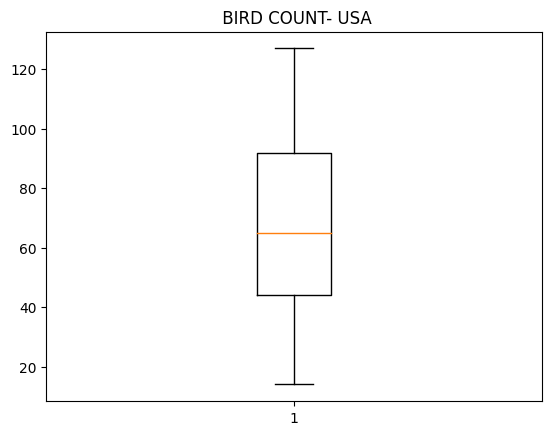

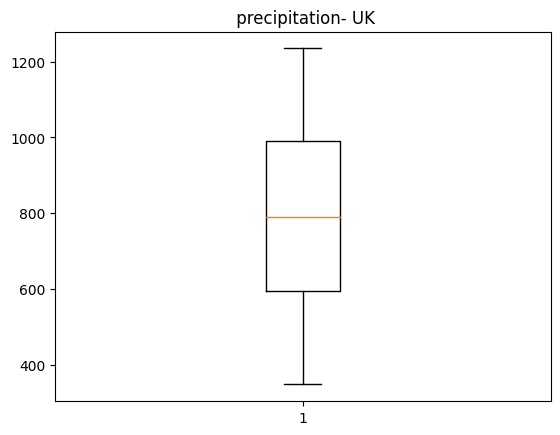

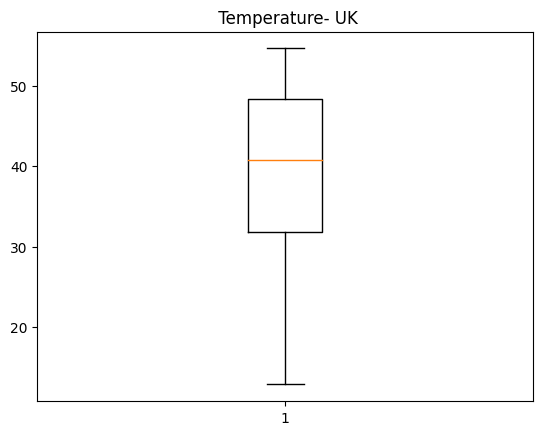

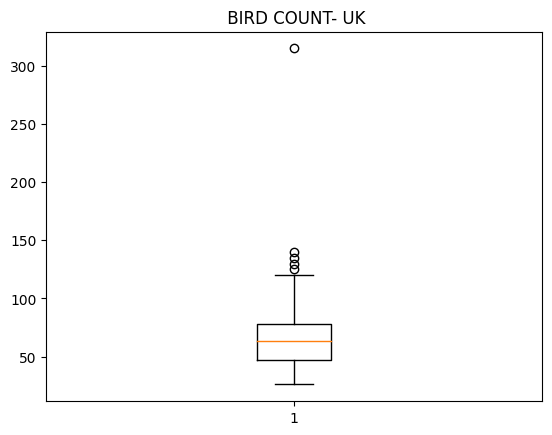

In [13]:
sheet_names=excel_file.sheet_names
columns=["precipitation", "Temperature", "BIRD COUNT"]

#Iterate over each sheet
for sheet_name in sheet_names:
    #Read the sheet data into a DataFrame
    df_sheet= pd.read_excel(excel_file, sheet_name=sheet_name)

    #Check if the required columns exist in the sheet
    if all(col in df_sheet.columns for col in columns):
        #Plot box plots for each feature in the sheet
        for column in columns:
             plt.figure()
             plt.boxplot(df_sheet[column])
             plt.title(f" {column}- {sheet_name}")
             plt.show()

    else:
      print(f"Sheet '{sheet_name}' does not have the required columns.")

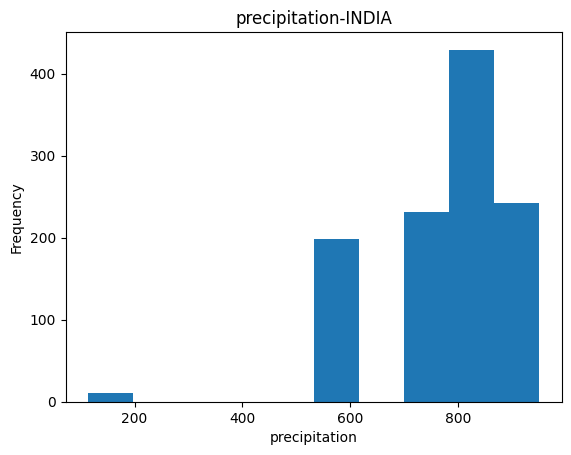

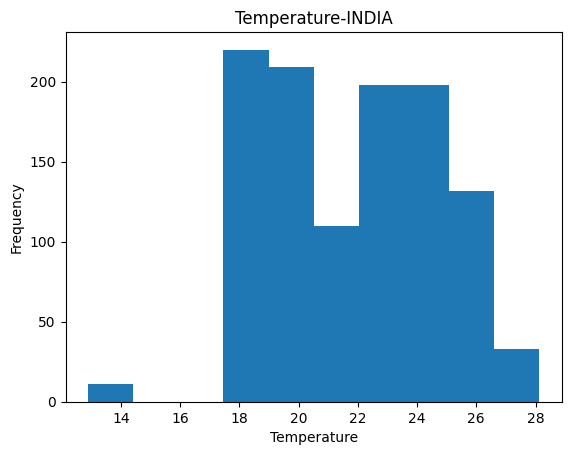

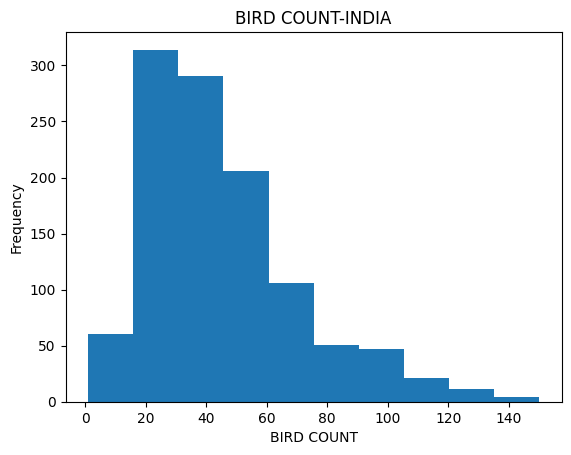

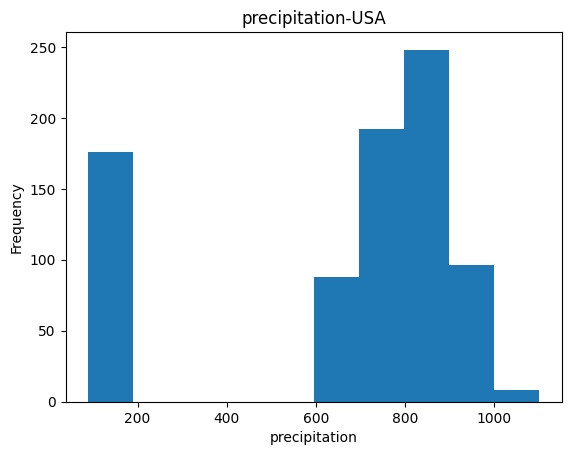

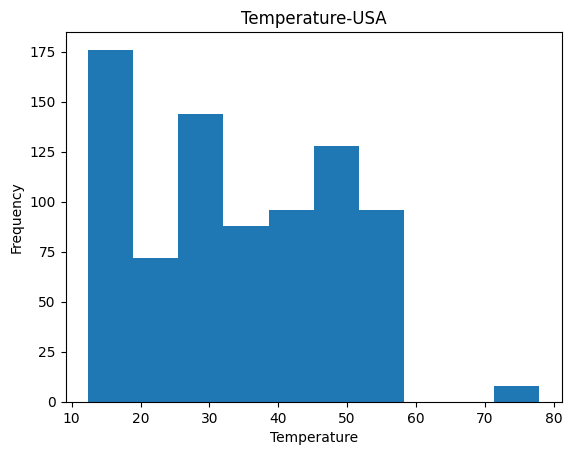

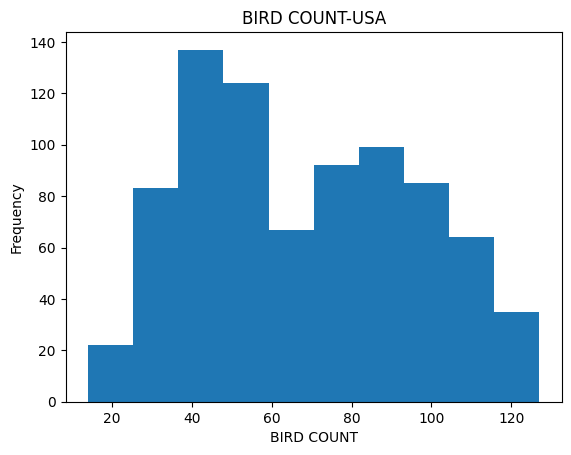

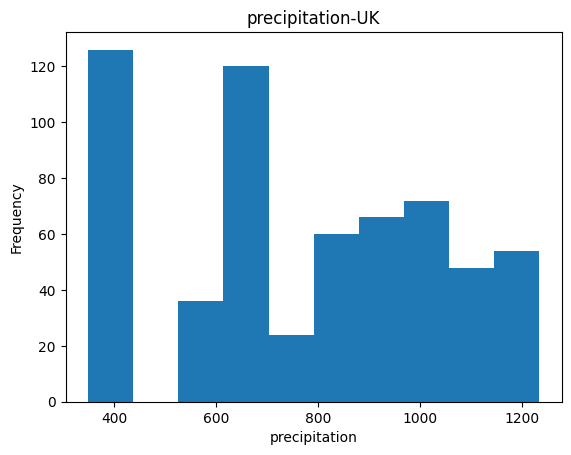

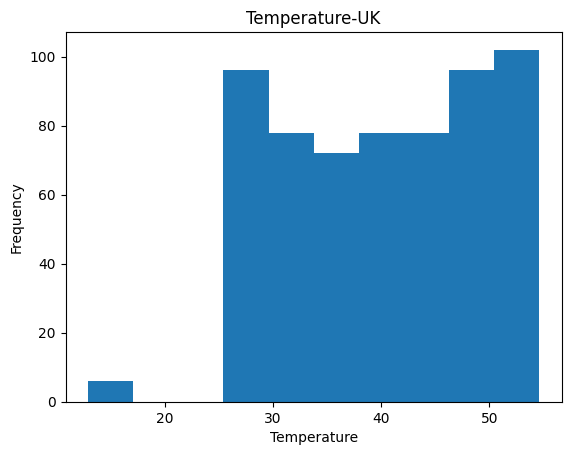

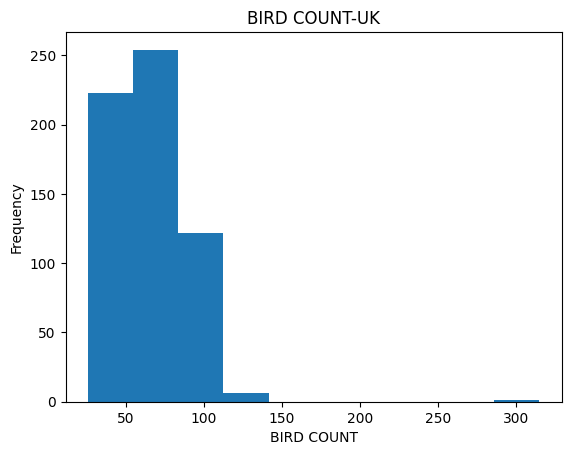

In [14]:
for sheet_name in sheet_names:
     #Read the sheet data into a Dataframe
     df_sheet= pd.read_excel(excel_file, sheet_name= sheet_name)

     #Check if the required columns exist in the sheet
     if all(col in df_sheet.columns for col in columns):
      # Plot histograms for each feature in the sheet
        for column in columns:
          plt.figure()
          plt.hist(df_sheet[column], bins=10)
          plt.title(f"{column}-{sheet_name}")
          plt.xlabel(column)
          plt.ylabel("Frequency")
          plt.show()

     else:
         print(f"Sheet '{sheet_name}' does not have the required columns.")

In [15]:
columns = ["Temperature","precipitation"]
combined_df1= pd.concat([df_sheet1, df_sheet2, df_sheet3], ignore_index=True)
print("Combined dataset size:", combined_df1.shape)

scaler=StandardScaler()
columns= ["Temperature","precipitation"]
scaled_data1= scaler.fit_transform(combined_df1[columns])


#Create a Dataframe with scaled input variables
scaled_df1= pd.DataFrame(scaled_data1, columns=columns)

         #add the scaled input variables to the original Datafrase
combined_df1[columns]=scaled_df1

print(combined_df1.head())

Combined dataset size: (2525, 5)
   YEAR  Temperature  precipitation       BIRD SPECIES  BIRD COUNT
0  1920    -0.655223       0.691071  Falco tinnunculus          12
1  1921    -0.995161      -2.603769  Falco tinnunculus          13
2  1922    -1.437080       0.279420  Falco tinnunculus          14
3  1923    -0.419754       0.061133  Falco tinnunculus          15
4  1924    -0.811097       0.649893  Falco tinnunculus          16


In [16]:
bird_count_scaler = StandardScaler()
scaled_bird_count =bird_count_scaler.fit_transform(combined_df1[['BIRD COUNT']])

#Add the scaled 'Bird count column to the original DataFrame
combined_df1['BIRD COUNT'] =scaled_bird_count

combined_df1

,YEAR,Temperature,precipitation,BIRD SPECIES,BIRD COUNT
0,1920,-0.655223,0.691071,Falco tinnunculus,-1.600571
1,1921,-0.995161,-2.603769,Falco tinnunculus,-1.564904
2,1922,-1.437080,0.279420,Falco tinnunculus,-1.529238
3,1923,-0.419754,0.061133,Falco tinnunculus,-1.493571
4,1924,-0.811097,0.649893,Falco tinnunculus,-1.457904
...,...,...,...,...,...
2520,2016,0.221154,1.335335,European Robin,-0.994235
2521,2017,-0.143658,0.742176,European Robin,0.575104
2522,2018,0.909321,-0.480167,European Robin,0.218436
2523,2019,1.854514,-1.537465,European Robin,-0.352233


In [17]:
X=combined_df1[['precipitation', 'Temperature']]
input_columns=combined_df1[['precipitation', 'Temperature']]
y=combined_df1['BIRD COUNT']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model =tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_dim=len(X_train.columns), kernel_regularizer =regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01)) )
model.add(tf.keras.layers. Dense (1, activation='linear'))

model.compile(optimizer ='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=500, verbose=2)

Epoch 1/100
4/4 - 2s - 444ms/step - loss: 2.1280
Epoch 2/100
4/4 - 0s - 9ms/step - loss: 2.0325
Epoch 3/100
4/4 - 0s - 9ms/step - loss: 1.9736
Epoch 4/100
4/4 - 0s - 10ms/step - loss: 1.9195
Epoch 5/100
4/4 - 0s - 9ms/step - loss: 1.8678
Epoch 6/100
4/4 - 0s - 8ms/step - loss: 1.8214
Epoch 7/100
4/4 - 0s - 15ms/step - loss: 1.7741
Epoch 8/100
4/4 - 0s - 10ms/step - loss: 1.7314
Epoch 9/100
4/4 - 0s - 9ms/step - loss: 1.6907
Epoch 10/100
4/4 - 0s - 16ms/step - loss: 1.6508
Epoch 11/100
4/4 - 0s - 13ms/step - loss: 1.6142
Epoch 12/100
4/4 - 0s - 9ms/step - loss: 1.5790
Epoch 13/100
4/4 - 0s - 9ms/step - loss: 1.5459
Epoch 14/100
4/4 - 0s - 10ms/step - loss: 1.5152
Epoch 15/100
4/4 - 0s - 14ms/step - loss: 1.4851
Epoch 16/100
4/4 - 0s - 9ms/step - loss: 1.4574
Epoch 17/100
4/4 - 0s - 14ms/step - loss: 1.4314
Epoch 18/100
4/4 - 0s - 9ms/step - loss: 1.4064
Epoch 19/100
4/4 - 0s - 9ms/step - loss: 1.3827
Epoch 20/100
4/4 - 0s - 9ms/step - loss: 1.3610
Epoch 21/100
4/4 - 0s - 10ms/step - los

In [20]:
custom_temperature=[9,5,7,12,20,25]
custom_precipitation= [1120, 1111,100,422,560,987]

custom_data= pd.DataFrame({
    'Temperature': custom_temperature,
    'precipitation': custom_precipitation,
    'BIRD COUNT': 0 #Placeholder value for Bird count

     })

In [21]:
scaled_custom_data= scaler.transform(custom_data[['Temperature', 'precipitation']])

In [22]:
predicted_scaled_bird_counts= model.predict(scaled_custom_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


In [23]:
predicted_bird_counts=bird_count_scaler.inverse_transform(predicted_scaled_bird_counts)

In [24]:
print("Predicted Bird Counts:")
for count in predicted_bird_counts:
    print(count)

Predicted Bird Counts:
[59.851562]
[60.168133]
[64.31613]
[51.23584]
[47.805584]
[64.82938]


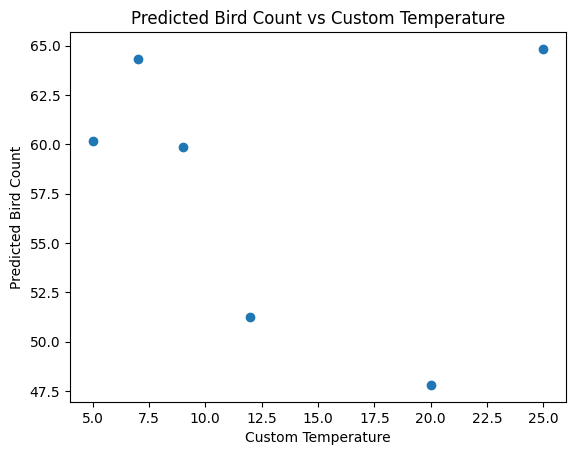

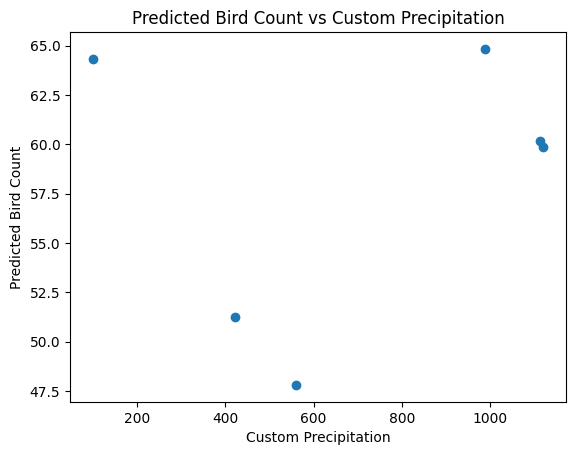

In [25]:
import matplotlib.pyplot as plt

#Plotting against custom temperature
plt.scatter(custom_temperature, predicted_bird_counts)
plt.xlabel('Custom Temperature')
plt.ylabel('Predicted Bird Count')
plt.title("Predicted Bird Count vs Custom Temperature")
plt.show()

 #Plotting against custom precipitation
plt.scatter(custom_precipitation, predicted_bird_counts)
plt.xlabel('Custom Precipitation')
plt.ylabel("Predicted Bird Count")
plt.title('Predicted Bird Count vs Custom Precipitation')
plt.show()

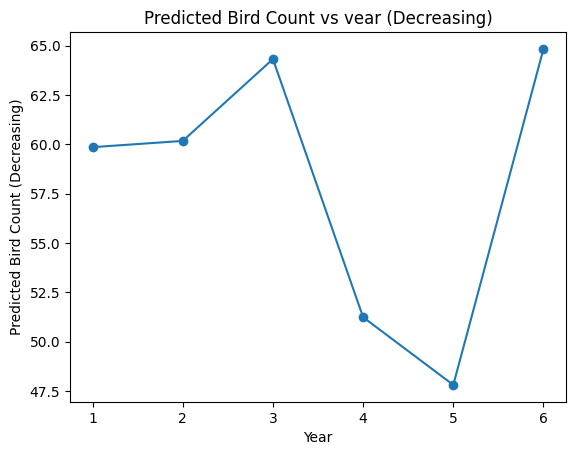

In [26]:
num_years=len(custom_data)
# create a decreasing sequence of years starting from a maximum value
years =np.arange(num_years, 0, -1)
decreasing_counts= np.flip(predicted_bird_counts.flatten())
plt.plot(years, decreasing_counts, 'o-')
plt.xlabel('Year')
plt.ylabel('Predicted Bird Count (Decreasing)')
plt.title('Predicted Bird Count vs vear (Decreasing)')
plt.show()

In [27]:
r2_scores =bird(y_test, model.predict(X_test))
print(" R-squared score:", r2_scores)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
 8-squared score: 48.17581657736573
